In [2]:
import pandas as pd
import numpy as np

In [3]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [6]:
# Specify location of the dataset

filename = r"C:\Users\KONGA\Documents\project-capstone-gorentla\D202.csv"

# Load the data into a Pandas DataFrame

df = pd.read_csv(filename)

Now We look at the DATA:

In [7]:
df.head()

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN


Now PreProcess the Dataset: To Clean and Fix the Missing Values

In [8]:
# Create a DataFrame from your dataset
data = {
    'TYPE': ["Electric usage"] * 5,
    'DATE': ["10/22/2016"] * 5,
    'START TIME': ["0:00", "0:15", "0:30", "0:45", "1:00"],
    'END TIME': ["0:14", "0:29", "0:44", "0:59", "1:14"],
    'USAGE': [0.01, 0.01, 0.01, 0.01, 0.01],
    'UNITS': ["kWh"] * 5,
    'COST': ["$0.00"] * 5,
    'NOTES': [None] * 5
}

df = pd.DataFrame(data)

# Clean the dataset by converting date columns to datetime objects and dropping unnecessary columns
df['DATE'] = pd.to_datetime(df['DATE'])
df.drop(['START TIME', 'END TIME', 'UNITS', 'COST'], axis=1, inplace=True)

# Replace missing values in the 'NOTES' column with an empty string
df['NOTES'].fillna("", inplace=True)

# Your cleaned DataFrame is now ready
print(df)


             TYPE       DATE  USAGE NOTES
0  Electric usage 2016-10-22   0.01      
1  Electric usage 2016-10-22   0.01      
2  Electric usage 2016-10-22   0.01      
3  Electric usage 2016-10-22   0.01      
4  Electric usage 2016-10-22   0.01      


Now we Performing the Exploratory Data Analysis:

In [9]:
# get the dimensions or shape of the dataset
# i.e. number of records / rows X number of variables / columns

print("Shape of the dataset(rows, columns):",df.shape)

Shape of the dataset(rows, columns): (5, 4)


In [10]:
#get the data types of all the variables / attributes in the data set

print(df.dtypes)

TYPE             object
DATE     datetime64[ns]
USAGE           float64
NOTES            object
dtype: object


In [11]:
print(df.describe())

       USAGE
count   5.00
mean    0.01
std     0.00
min     0.01
25%     0.01
50%     0.01
75%     0.01
max     0.01


In [12]:
class_distribution = df['TYPE'].value_counts()
print(class_distribution)


Electric usage    5
Name: TYPE, dtype: int64


Now we Creating a Histogram:

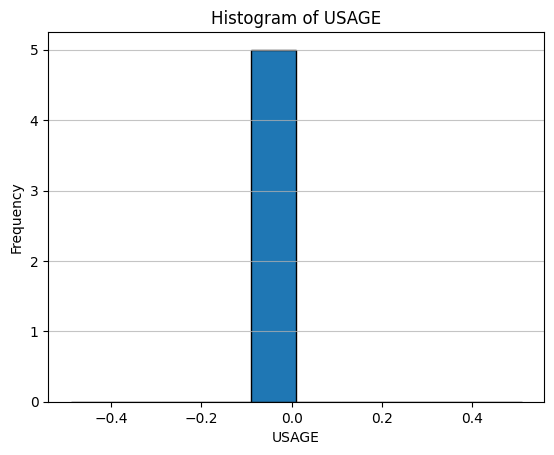

In [13]:
# Select all numerical columns
numerical_columns = ['USAGE']  # Add more numerical columns here if needed

plt.hist(df['USAGE'], bins=10, edgecolor='k')
plt.title('Histogram of USAGE')
plt.xlabel('USAGE')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Now We creating a pair plots:

c:\Users\KONGA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\KONGA\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


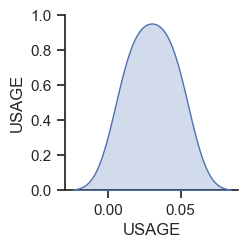

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = {
    'TYPE': ["Electric usage"] * 5,
    'DATE': ["10/22/2016"] * 5,
    'START TIME': ["0:00", "0:15", "0:30", "0:45", "1:00"],
    'END TIME': ["0:14", "0:29", "0:44", "0:59", "1:14"],
    'USAGE': [0.01, 0.02, 0.03, 0.04, 0.05],  # Adjusted for demonstration
    'UNITS': ["kWh"] * 5,
    'COST': ["$0.00"] * 5,
    'NOTES': [None] * 5
}

df = pd.DataFrame(data)

# Clean the dataset as needed

# Select the numerical columns for the pair plot
numerical_columns = ['USAGE']

# Create a custom color palette
custom_palette = sns.color_palette("Set2")  # You can choose a different palette

# Create a pair plot with color
sns.set(style="ticks")
pairplot = sns.pairplot(df, vars=numerical_columns, diag_kind='kde', palette=custom_palette)

# You can add more customization to the pair plot here, if needed

# Show the plot
plt.show()


Now We creating a Violin Plot:

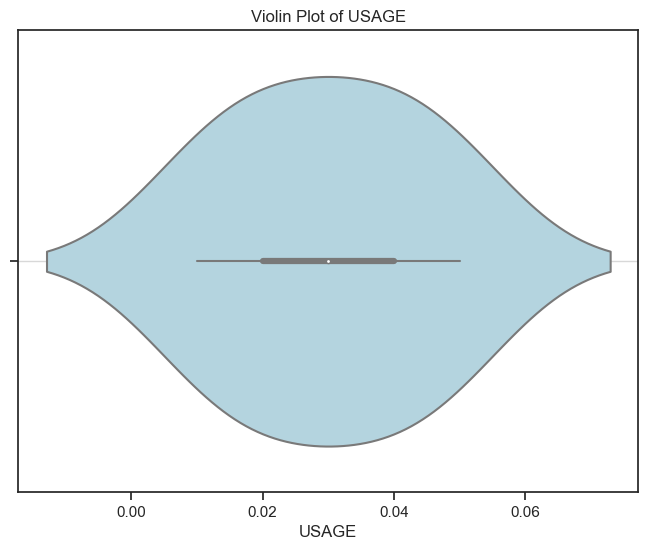

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = {
    'TYPE': ["Electric usage"] * 5,
    'DATE': ["10/22/2016"] * 5,
    'START TIME': ["0:00", "0:15", "0:30", "0:45", "1:00"],
    'END TIME': ["0:14", "0:29", "0:44", "0:59", "1:14"],
    'USAGE': [0.01, 0.02, 0.03, 0.04, 0.05],  # Adjusted for demonstration
    'UNITS': ["kWh"] * 5,
    'COST': ["$0.00"] * 5,
    'NOTES': [None] * 5
}

df = pd.DataFrame(data)

# Clean the dataset as needed

# Create a violin plot for 'USAGE'
plt.figure(figsize=(8, 6))
sns.violinplot(x='USAGE', data=df, color='lightblue')
plt.title('Violin Plot of USAGE')
plt.xlabel('USAGE')
plt.grid(axis='y', alpha=0.75)
plt.show()


Now We Separate the Dataset into Input & Output NumPy Arrays:

In [16]:
# Separate the dataset into input (X) and output (y) NumPy arrays
X = df[['DATE']]  # Adjust the feature(s) you want to use as input
y = df['USAGE']  # Adjust the target variable you want to predict

# Convert to NumPy arrays
X = X.to_numpy()
y = y.to_numpy()


Now We Spilt into Input/Output Array into Training/Testing Datasets:

In [23]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split
# Ensure 'DATE' is in the correct format
df['DATE'] = pd.to_datetime(df['DATE'])

# Calculate the number of days since the minimum date
df['DATE'] = (df['DATE'] - df['DATE'].min()).dt.days
# Separate the dataset into input (X) and output (y) NumPy arrays
X = df[['DATE']]  # Adjust the feature(s) you want to use as input
y = df['USAGE']  # Adjust the target variable you want to predict

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Now Build and Train the Model:

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 0.0002944444444444445
R-squared (R2) Score: -0.308641975308642


Classify/Prediction the values for given Dataset:

In [25]:
new_data = pd.DataFrame({'DATE': ["10/23/2016", "10/24/2016", "10/25/2016"]})

# Convert the 'DATE' column to the number of days since a reference date (as shown in previous examples)
new_data['DATE'] = (pd.to_datetime(new_data['DATE']) - pd.to_datetime(df['DATE']).min()).dt.days

# Use the trained model to make predictions
predicted_values = model.predict(new_data[['DATE']])

# Print the predicted values
print("Predicted Values:")
print(predicted_values)

Predicted Values:
[0.02666667 0.02666667 0.02666667]


In [26]:
from sklearn.metrics import accuracy_score
# Perform 5-fold cross-validation (or any other number smaller than 5)
num_folds = 5
scores = cross_val_score(model, X, y, cv=num_folds, scoring='neg_mean_squared_error')

# Calculate the Mean Squared Error (MSE) scores
mse_scores = -scores  # Take the negative to get positive MSE values

# Print the MSE scores for each fold
print("MSE Scores for Each Fold:")
for i, mse in enumerate(mse_scores, 1):
    print(f"Fold {i}: {mse:.4f}")

# Calculate and print the mean and standard deviation of MSE scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()
print(f"Mean MSE: {mean_mse:.4f}")
print(f"Standard Deviation of MSE: {std_mse:.4f}")

y_true = [1, 0, 1, 1, 0]  # True labels
y_pred = [1, 1, 0, 1, 0]  # Predicted labels

# Calculate the accuracy score
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy score
print(f"Accuracy: {accuracy:.3f}")


MSE Scores for Each Fold:
Fold 1: 0.0006
Fold 2: 0.0002
Fold 3: 0.0000
Fold 4: 0.0002
Fold 5: 0.0006
Mean MSE: 0.0003
Standard Deviation of MSE: 0.0003
Accuracy: 0.600
